# **Project Leyenda - Deliverable 1**

*Group* : 
|Author|Center|Promo|Mail| 
|---|---|---|---|
|De Jesus Correia Alexandre|Nanterre|FISE INFO A5|alexandre.dejesuscorreia@viacesi.fr|
|Charlut Steven|Nanterre|FISE INFO A5|steven.charlut@viacesi.fr|
|Debraize Killian|Nanterre|FISE INFO A5|killian.debraize@viacesi.fr|
|Raies Youssef|Nanterre|FISE INFO A5|youssef.raies@viacesi.fr|
|Kinya Mwongera Sharon|Nanterre|FISE INFO A5|sharon.kinyamwongera@viaceis.fr|

![DeepLearning](https://i.pinimg.com/550x/4f/a5/54/4fa5542fadd6a9ee2e7f995b981934f6.jpg)


# **Project**

## Context :

**TouNum**, a company specializing in the digitization of documents (text, images, etc.), is looking to expand its services to include 'Machine Learning' tools. Their current focus is on providing solutions for companies with large volumes of documents that need digitization, and they want to offer a service for automatic image categorization. Although TouNum has experience in digitization, they lack expertise in Machine Learning and have turned to CESI Data Science specialists to develop a solution. The proposed solution aims to analyze and describe images (captioning) in an automated way.

In addition to this core goal, there are two main challenges:
- **`Image Cleaning`** : Due to variations in image quality (e.g., blurriness, noise), a cleaning/pre-processing step is required before analyzing the images.
- **`Image Classification`** : Since many of the digitized images are not actual photos but could be documents, diagrams, sketches, or paintings, there needs to be an initial classification step to separate photographs from other types of images.

Luckily, TouNum has a dataset with thousands of categorized and labeled images, which can be used for supervised learning to train the necessary models.

## Objectives :

The project has three main objectives that will lead to a fully automated image analysis and captioning solution:
- **`Binary Classification`** :
Develop a neural network model using TensorFlow and SciKit to classify images into two categories—photos and non-photos (e.g., scanned documents, diagrams, paintings). Ideally, the model should differentiate between photos and other types of images, including drawings or paintings. This module will involve image pre-processing and the use of convolutional neural networks (CNN).
- **`Image Processing`** :
Implement image cleaning and pre-processing techniques using simple convolution filters to enhance the quality of the images before running further analyses. This step ensures that images are clear enough for subsequent classification and captioning tasks.
- **`Image Captioning`** :
Build a captioning model that automatically generates descriptive captions for images. This will require using a combination of convolutional neural networks (CNNs) for image processing and recurrent neural networks (RNNs) to generate textual descriptions. The model will be trained using classical datasets for image captioning.

The final solution should be presented as a reproducible workflow (using Jupyter notebooks), and the prototype must be ready for deployment within five weeks. The workflow should be scalable and adaptable to any image data and include clear documentation to ensure maintenance and further development.

## Tools : 

For our project, we will utilize **`Python`** as our programming language. Python offers libraries, such as NumPy and Pandas, that facilitate efficient data manipulation and analysis, while libraries like Scikit-learn and TensorFlow provide robust tools for implementing machine learning (ML) and deep learning (DL) algorithms.

**`TensorFlow`**, a powerful open-source framework designed for building and deploying ML and DL models, will be our main project tool.
It operates on the concept of 'tensors', which are multi-dimensional arrays that allow for efficient data representation and manipulation. The term 'flow' refers to the way data moves through a computational graph, where operations are represented as nodes and tensors as edges. This architecture enables TensorFlow to optimize the performance of complex mathematical computations, making it ideal for tasks such as neural network training and inference. 

Moreover, TensorFlow provides a rich ecosystem with high-level APIs, such as **`Keras`**, for quick model prototyping, along with lower-level operations for fine-tuning performance.

# **Deliverable 1 : Binary Classification**

TouNum aims to automate the selection of photos from a dataset that contains various types of images, such as scanned text, drawings, diagrams, and paintings. The ultimate goal is to filter out images that are not photos in preparation for captioning, which will be addressed in the next phase of the project. To achieve this, the deliverable will involve building and training a neural network model using TensorFlow to differentiate between photos and non-photo images.

Given the wide variety of image types in the dataset, the challenge lies in **creating a robust model that can reliably distinguish photos from these other categories**. The approach should start with simpler distinctions and gradually incorporate more challenging tasks, such as differentiating realistic paintings from actual photos.

The deliverable will include a detailed documentation of the neural network's architecture, the training process, and the resulting performance. The performance metrics will also be thoroughly analyzed to ensure the model strikes a balance between bias and variance and avoids common pitfalls like overfitting or underfitting.

## Basic Theory : 

#### Perceptron : 
A **'Perceptron'** is a type of artificial neuron, a basic unit in neural networks, designed to simulate the behavior of biological neurons. 

It takes several `input values`, applies `weights` to each of these inputs, `sums` them up with a `bias` (additional parameter that helps adjust the output), and passes the result through an `activation function`. If the result exceeds a certain threshold, the perceptron "fires", meaning it produces an `output` (typically 1; otherwise, the output is 0). This process where the input data is passed through the network’s layers to generate an output is called **`Forward Propagation`**.

![Perceptron](https://miro.medium.com/v2/resize:fit:940/1*6HtyqOTYyYUzUeERVXL8Ag.png)

`Weights` are parameters that determines the strength and direction of the connection between neurons across layers. It influences how much influence an input or neuron’s output has on the following layer, and during training, the model adjusts these weights to minimize errors and improve its predictions.

An `activation function` defines how the output of a neuron is calculated based on its input, **introducing non-linearity into the model**. Common examples include :
- the **sigmoid function**, which outputs values between 0 and 1, 
- the **ReLU (Rectified Linear Unit)**, which outputs 0 for negative inputs and the input itself for positive values,
- the **tanh function**, which maps inputs to values between -1 and 1,
- the **softmax function**, which converts raw outputs into probabilities on classes (and normalizing them so that the sum of all probabilities equals 1).

These functions are crucial in neural networks because it introduces non-linearity, allowing the model to learn and represent complex patterns and relationships beyond simple linear combinations of inputs, so we can solve non linear problem.

This simple decision-making process enables a perceptron to classify data into two categories, making it the foundation of binary classifiers. However, on its own, a single perceptron is limited in its ability to solve complex problems, as it can only classify linearly separable data.

#### Deep Neural Network :
A **'Deep Neural Network'** is an advanced structure composed of multiple layers of interconnected neurons (or perceptrons). 

Instead of just a single perceptron making decisions, in a deep neural network, there are several `hidden layers` between the `input player` and the `output layer`. Each layer processes data through many neurons, each performing a similar function to a perceptron. The network's depth allows it to capture more complex patterns and hierarchical representations from the data. The neurons in each layer take in the weighted sum of inputs from the previous layer, pass them through activation functions (like ReLU or sigmoid), and then send the output to the next layer.

![DNN](https://www.researchgate.net/profile/Chuan-Lin-3/publication/333567419/figure/fig4/AS:765686351671297@1559565260413/Construction-of-the-deep-neural-network-DNN-model.jpg)

`Hidden layers` in a DNN can include :
- **Dense layers** (*or Fully connected layers*) : connect every neuron in one layer to every neuron in the next, allowing the network to capture global patterns in the data, 
- **Convolutional layers** : apply filters to detect local features like edges or textures, 
- **Dropout layers** : randomly deactivate a portion of neurons during training to prevent overfitting, improving generalization, 
- **Batch normalization layers** : normalize the inputs to each layer, speeding up training and improving stability, 
- **Pooling layers** : reduce the spatial dimensions of feature maps by summarizing nearby values, which helps to reduce computational complexity and makes the model more robust to small translations in the input. The most common types are ***Max Pooling***, which selects the maximum value from a region, and ***Average Pooling***, which takes the average of the values in that region.

Through this process, the network can model intricate relationships and solve highly non-linear problems. Deep neural networks have become essential in tasks like image recognition, natural language processing, and other sophisticated AI applications due to their capacity to learn complex patterns through multiple layers of abstraction.

### A.3. Neurons & Tensors

A **`neuron`** is a fundamental computational unit that processes input data :
- The neurons in the input layer do not perform any computation : it simply forwards the input data to the next layer. Each neuron here represents a feature vector of the input data.
- The neurons in the hidden layers compute a weighted sum of the inputs : each input is associated with a weight that determines its significance.
- The neurons in the output layer produce the final prediction (or classification).

In our model, the **inputs** are the dataset's images. When processed by a neural network, these images are converted into **numerical matrices** that represent pixel values. 
However, neural networks (especially in TensorFlow), essentially manipulate **tensors** throughout training and predictions.

A **`tensor`** is a generalized data structure that can be seen as *multi-dimensional arrays of numbers* that represent complex data. For example, a one-dimensional vector is referred to as a 1D tensor, while a two-dimensional matrix is called a 2D tensor. In the case of a color image, a tensor would be a 3D array : height, width, and depth (corresponding to the three color channels : red, green and blue).

Hence, each image need to be converted into a tensor, and will then be passed through the network to be analyzed and classified. 

<img src="https://hkilter.com/images/7/7a/Tensors.png"  width="600">

## B. Neural Networks for Image Data

### B.1. Image Data

A `digital image` is made of pixels, which are the smallest elements of an image. 

In a black-and-white image, each pixel is represented by a number ranging from 0 (completely dark) to 255 (completely bright). These numbers indicate the intensity of light at that pixel. This kind of image data is the simplest form, often referred to as a grayscale image, because it only contains information about the brightness, not color.

In color images, each pixel is represented by three numbers instead of one. These three numbers correspond to the primary colors of light: Red, Green, and Blue (RGB). Each of these values also ranges from 0 to 255, where 0 means no contribution of that color and 255 means the maximum contribution. By combining different levels of red, green, and blue, we can create any color.

So, whether an image is black-and-white or color, the data underlying an image consists of a large grid of numerical values. These numbers form what we call **`image data`**, and this data is essential for computers to process, manipulate, or analyze images in tasks like image recognition, editing, or machine learning.

***Example** : the image data for an image "8" from the MNIST Dataset* 

<img src="https://miro.medium.com/v2/resize:fit:794/0*9iwH0ebD6mQAUFt8"  width="400">

## B.2. Convolutional Neural Networks (CNNs)

**`Convolutional Neural Networks`** are specialized for image data. They excel in identifying spatial hierarchies and features within visual information.

CNNs utilize a special type of "hidden" layer, the **convolutional layer**, that makes them well-positioned to learn from image and image-like data. Regarding image data, CNNs can be used for many different computer vision tasks, such as `image processing`, `classification`, `segmentation`, and `object detection`.

<img src="https://editor.analyticsvidhya.com/uploads/568241-4.png"  width="600">

The `input layer` represents the input image. Because we use RGB images as input, the input layer has three channels, corresponding to the red, green, and blue channels respectively, which are shown in this layer. 

The `convolutional layers` are the foundation of CNN, as they contain the `learned kernels`, which extract features that distinguish different images from one another (this is particularly important for classification). 

This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters, the **`kernel`** or filter, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image, but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels.

During the forward pass, the kernel slides across the height and width of the image, producing the image representation of that receptive region. This produces a two-dimensional representation of the image (the output, known as an **activation map**) that gives the response of the kernel at each spatial position of the image.

Like others hidden layers, after the convolution operation, an activation function (commonly the ReLU function) is applied to introduce non-linearity.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*ulfFYH5HbWpLTIfuebj5mQ.gif"  width="500">

`Hyperparameters of the Kernels` : 
- **Padding** : it conserves data at the borders of activation maps, which leads to better performance, and it can help preserve the input's spatial size, which allows an architecture designer to build deeper, higher performing networks. There exist many padding techniques, but the most commonly used approach is **zero-padding**, because of its performance, simplicity, and computational efficiency : the technique involves adding zeros symmetrically around the edges of an input.
- **Size** : refers to the dimensions of the sliding window over the input (often 3x3 or 5x5). Choosing this hyperparameter has a massive impact on the image classification task. For example, small kernel sizes are able to extract a much larger amount of information containing highly local features from the input. Then, a smaller kernel size also leads to a smaller reduction in layer dimensions, which allows for a deeper architecture. Conversely, a large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance. Large kernels are better suited to extract features that are larger.
- **Stride** : indicates how many pixels the kernel should be shifted over at a time. The impact stride has on a CNN is similar to kernel size. As stride is decreased, more features are learned because more data is extracted, which also leads to larger output layers. On the contrary, as stride is increased, this leads to more limited feature extraction and smaller output layer dimensions.

The `pooling layers` have the purpose of gradually decreasing the spatial extent of the network, which reduces the parameters and overall computation of the network. There are many types of pooling layers in different CNN architectures, but `Max pooling` is the most popular technique (where the maximum value from a specific region of the feature map is taken).

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*sK7oP1m129V_oNGSsHIm_w.png"  width="500">

A `flatten layer` can also be necessary : it converts a multi-dimensional layer into a one-dimensional vector to fit the input of a fully-connected layer for classification. For example, a 5x5x2 tensor would be converted into a vector of size 50. Particularly, some activation function (like the softmax function in dense layers) requires a 1-dimensional input.

<img src="https://www.megabagus.id/wp-content/uploads/Machine_Learning/deep_learning/CNN/flattening.jpg"  width="300">

### B.3. Image Classification 

The early applications of neural networks are image classification. 

For example, the digit recognition for ‘0’ to ‘9’ given various hand-written images. A trained neural network model can take an unknown digital image data to predict the probabilities for the multi-class output “0” to “9”. All these probabilities will then sum up to 1.0.

Likewise, if we feed a neural network with various kinds of images with their corresponding labels (images and photos), the neural network can be trained to tell the likelihood for a new image. 

For an algorithm to recognize images in a manner comparable to human recognition, it must undergo a similar learning process. We achieve this by training the algorithm with thousands of labeled images (some labeled “photos”, and other types). During this training, the model learns to discern specific features that differentiate images from photos. Once trained, the model can analyze new, unlabeled images and determine whether they depict a photo or an image based on the features it has learned. 

***Example :** Image classification with animal labels* 

<img src="https://miro.medium.com/v2/resize:fit:786/format:webp/0*sVuvA9R9x8s3_EJ_.png"  width="500">

### B.4. AutoEncoders (AE)

An **`autoencoder`** is a specialized type of neural network designed **to replicate its input values as its output values**. Unlike neural networks which are generally categorized under supervised learning, autoencoders are categorized under **unsupervised learning**, because they **do not need additional labeled targets**. The key interest in autoencoders lies not in the output layer (because it is simply a copy of the input layer) but in the **hidden layers**.

An autoencoder should have fewer neurons in the hidden layers than that of the input layers. Because the hidden layers, which have fewer neurons than the input layers, must extract and retain only the most important features of the input data, the autoencoder will be forced **to compress the data into a lower-dimensional representation**, capturing the essential patterns while filtering out irrelevant noise. 

If the hidden layers had more neurons than the input layers, the model could become too flexible and reproduce the input exactly, including the noise, without effectively learning the significant patterns. The dimensionality reduction enforced by having fewer neurons in the hidden layers helps the model focus on the core features of the data.

<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*RR_anSGJL6W3FqCw.png"  width="600">

The `encoder` compresses the input values into a more compact representation at the core layer. This process resembles a funnel that is wide on the left side, where the input data enters, and narrows towards the right side, where the compressed representation is produced.

The `decoder` reconstructs the compressed information to generate the output. This process is visually similar to an inverted funnel: narrow on the left side, where the compressed data is input, and widening towards the right side, where the reconstructed output is produced. The information of the image is highly compressed in the core hidden layer then recontructed to itself. Thus the core hidden layer should retain the information of the image as much as possible.

Typically, the architecture of the decoderis designed **to mirror** the encoder. This means that the number of neurons and the number of hidden layers in the decoding funnel are structured to correspond to those in the encoding funnel. Most practitioners adopt this symmetry as a standard approach. 

Autoencoders have various applications, like **dimensionality reduction**, **image coloring** or even **noise reduction**. 

# **Building a Neural Network Model for Binary Classification**

Now that we have established the theoretical foundations regarding image classification and key concepts such as convolutional neural network architecture (CNN), we can move on to the creation of our model. In the next section, we will design and implement our binary classification model. 

## 1. Initial Setup

In [2]:
# Import libraries

# TensorFlow/Keras Libraries
import tensorflow as tf
import keras_tuner as kt

from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Others Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import shutil

from sklearn.utils.class_weight import compute_class_weight
from tqdm.notebook import tqdm
from PIL import Image
from tqdm.notebook import tqdm  

In [2]:
# DataSet Loading

base_dir = os.getcwd()
relative_path = r"..\..\DataSets\data_set_livrable_1"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

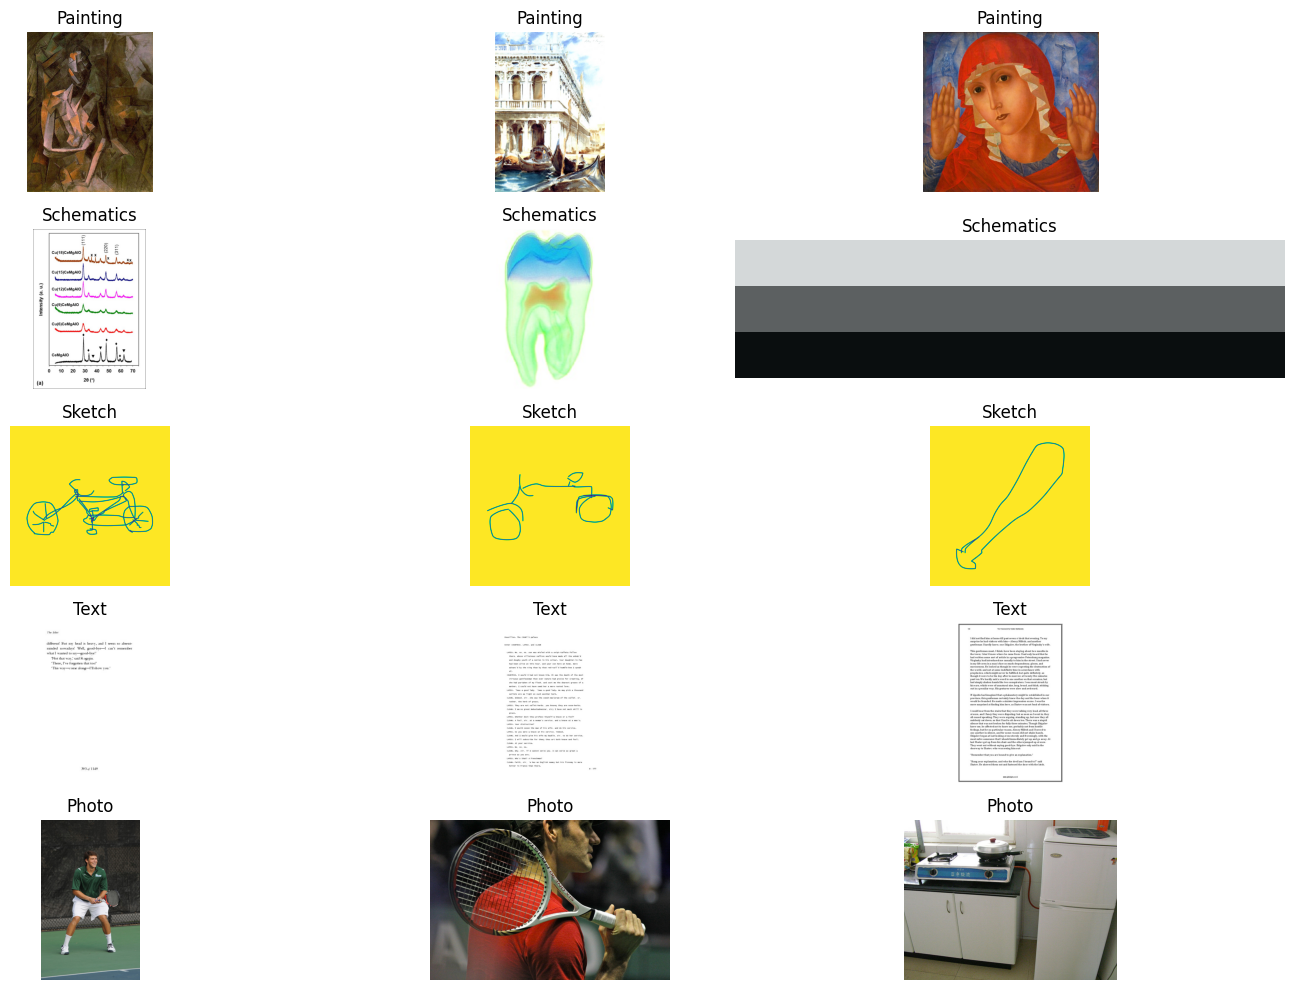

In [3]:
# Data Visualization 

# Load images from each category
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            images.append(img_path)
    return images

# Define the subdirectory names for each category
photo_folder = os.path.join(dataset_dir, 'Photo')
image_folder = os.path.join(dataset_dir, 'Image')
categories = ['Painting', 'Schematics', 'Sketch', 'Text', 'Photo']

# Dictionary to hold images from each category
category_images = {}

# Load images from each category in the Image folder
for category in ['Painting', 'Schematics', 'Sketch', 'Text']:
    category_folder = os.path.join(image_folder, category)
    category_images[category] = load_images_from_folder(category_folder)
category_images['Photo'] = load_images_from_folder(photo_folder)

# Function to plot a grid of images
def plot_sample_images(category_images, samples_per_category=3):
    plt.figure(figsize=(15, 10))
    for i, (category, images) in enumerate(category_images.items()):
        # Randomly select a few images from each category
        sample_images = random.sample(images, min(samples_per_category, len(images)))
        for j, img_path in enumerate(sample_images):
            img = mpimg.imread(img_path)
            plt.subplot(len(category_images), samples_per_category, i * samples_per_category + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(category)
    plt.tight_layout()
    plt.show()

# Call the function to plot sample images
plot_sample_images(category_images, samples_per_category=3)

## 2. Data Cleaning

Some images in the datasets may cause problems or not be relevant for our model learning (e.g., monochrome images without patterns). It is therefore necessary to clean the dataset of unnecessary images, that is to say unusable (or corrupted) and monotonous files. For the latter, we will calculate the `pixel variance` of each file : **files with low variance will then be deleted** to ensure performance during the model’s construction. Let’s first analyze our dataset.

In [20]:
# Function to check for corrupted images and calculate pixel variance
def check_all_images_for_corruption_and_variance(directory):
    results = []
    low_variance_samples = []
    categories = ['Image', 'Photo']
    
    for category in categories:
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(directory, 'Image', subcategory)
                if os.path.exists(subcategory_path):
                    total_images = 0
                    corrupted_images = 0
                    low_variance_images = 0
                    for file in os.listdir(subcategory_path):
                        img_path = os.path.join(subcategory_path, file)
                        if os.path.isfile(img_path):
                            total_images += 1
                            try:
                                img = Image.open(img_path)
                                img.verify()  # Checks if the image is corrupted
                                # Reopen to calculate pixel variance
                                img = Image.open(img_path).convert('RGB')
                                img_array = np.array(img)
                                variance = np.var(img_array)
                                if variance < 50:  # Detects low variance images
                                    low_variance_images += 1
                                    low_variance_samples.append(img_path)
                            except (IOError, SyntaxError) as e:
                                corrupted_images += 1
                    results.append([subcategory, total_images, corrupted_images, low_variance_images])
        
        elif category == 'Photo':
            photo_path = os.path.join(directory, 'Photo')
            if os.path.exists(photo_path):
                total_images = 0
                corrupted_images = 0
                low_variance_images = 0
                for file in os.listdir(photo_path):
                    img_path = os.path.join(photo_path, file)
                    if os.path.isfile(img_path):
                        total_images += 1
                        try:
                            img = Image.open(img_path)
                            img.verify()  # Checks if the image is corrupted
                            # Reopen to calculate pixel variance
                            img = Image.open(img_path).convert('RGB')
                            img_array = np.array(img)
                            variance = np.var(img_array)
                            if variance < 50:  # Detects low variance images
                                low_variance_images += 1
                                low_variance_samples.append(img_path)
                        except (IOError, SyntaxError) as e:
                            corrupted_images += 1
                results.append(['Photo', total_images, corrupted_images, low_variance_images])

    return results, low_variance_samples  

def display_corruption_and_variance_stats(results):
    df = pd.DataFrame(results, columns=['Category', 'Total Images', 'Corrupted Images', 'Low Variance Images'])
    df['Proportion Corrupted (%)'] = (df['Corrupted Images'] / df['Total Images']) * 100
    df['Proportion Low Variance (%)'] = (df['Low Variance Images'] / df['Total Images']) * 100
    print(df)
    
def display_low_variance_images(low_variance_samples, num_images=3):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(low_variance_samples))):
        img = Image.open(low_variance_samples[i])
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Low Variance Image {i + 1}')
    plt.show()

     Category  Total Images  Corrupted Images  Low Variance Images  \
0    Painting          1920                 0                    0   
1  Schematics         10001                 1                  163   
2      Sketch          1406                 0                    0   
3        Text         10000                 0                   19   
4       Photo          9997                 0                    0   

   Proportion Corrupted (%)  Proportion Low Variance (%)  
0                  0.000000                     0.000000  
1                  0.009999                     1.629837  
2                  0.000000                     0.000000  
3                  0.000000                     0.190000  
4                  0.000000                     0.000000  


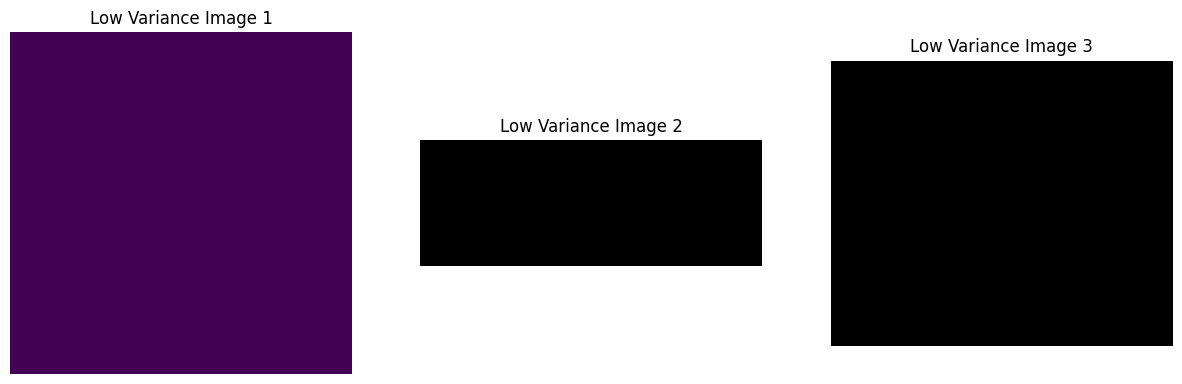

In [21]:
# Call the function to display the analysis
results, low_variance_samples = check_all_images_for_corruption_and_variance(dataset_dir)
display_corruption_and_variance_stats(results)
display_low_variance_images(low_variance_samples, num_images=3)

We can see that there is one corrupted image in the "Schematics" folder, as well as 163 images and 19 images with low variance  in the "Schematics" and "Text" folders respectively. 

To prevent future model learning problems, we will delete these files, and create a new **"clean dataset"**.

In [8]:
# Function to check if an image is corrupted or low variance
def check_image_quality(img_path):
    try:
        # Check if image is corrupted
        img = Image.open(img_path)
        img.verify()  
        
        # Reopen to check pixel variance
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img)
        variance = np.var(img_array)
        
        # Consider the image as "low quality" if variance is below a threshold
        if variance < 50:           # Adjust this threshold if necessary
            return "Low Variance"
        return "Valid"
    
    except (IOError, SyntaxError):
        return "Corrupted"

# Function to check if the file is already filled
def is_folder_filled(folder_path):
    total_files = sum([len(files) for r, d, files in os.walk(folder_path)])
    return total_files > 0

# Function to analyze the dataset and generate a DataFrame of corrupted and low quality images
def analyze_dataset_for_issues(dataset_dir):
    categories = ['Image', 'Photo']
    invalid_images_list = []
    
    for category in categories:
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(dataset_dir, 'Image', subcategory)
                if os.path.exists(subcategory_path):
                    img_files = [f for f in os.listdir(subcategory_path) if os.path.isfile(os.path.join(subcategory_path, f))]
                    
                    # Added a progress bar here for each sub-category
                    for img_file in tqdm(img_files, desc=f"Processing {subcategory}", leave=False):
                        img_path = os.path.join(subcategory_path, img_file)
                        quality_status = check_image_quality(img_path)
                        if quality_status != "Valid":
                            invalid_images_list.append({'Filename': img_file, 'Category': subcategory, 'Issue': quality_status})
        
        elif category == 'Photo':
            photo_path = os.path.join(dataset_dir, 'Photo')
            if os.path.exists(photo_path):
                img_files = [f for f in os.listdir(photo_path) if os.path.isfile(os.path.join(photo_path, f))]
                
                # Added progress bar for "Photo" category
                for img_file in tqdm(img_files, desc="Processing Photo", leave=False):
                    img_path = os.path.join(photo_path, img_file)
                    quality_status = check_image_quality(img_path)
                    if quality_status != "Valid":
                        invalid_images_list.append({'Filename': img_file, 'Category': 'Photo', 'Issue': quality_status})
    
    # Convert list to DataFrame
    df_invalid_images = pd.DataFrame(invalid_images_list)
    return df_invalid_images

# Function to create a clean dataset excluding corrupted or low variance images
def create_clean_dataset(df_invalid_images, dataset_dir, new_clean_dir):
    categories = ['Image', 'Photo']
    
    # Create new "clean dataset" folder
    os.makedirs(new_clean_dir, exist_ok=True)

    if is_folder_filled(new_clean_dir):
        print(f"Folder {new_clean_dir} is already filled. Skipping process.")
        return  # If the file is already filled, stop here to avoid redoing the copy.
    
    for category in categories:
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(dataset_dir, 'Image', subcategory)
                if os.path.exists(subcategory_path):
                    new_subcategory_path = os.path.join(new_clean_dir, 'Image', subcategory)
                    os.makedirs(new_subcategory_path, exist_ok=True)
                    
                    img_files = [f for f in os.listdir(subcategory_path) if os.path.isfile(os.path.join(subcategory_path, f))]
                    
                    # Added progress bar here for copying valid files
                    for img_file in tqdm(img_files, desc=f"Copying {subcategory}", leave=False):
                        img_path = os.path.join(subcategory_path, img_file)
                        new_img_path = os.path.join(new_subcategory_path, img_file)

                        # Check if image is corrupted or low variance
                        if not ((df_invalid_images['Filename'] == img_file) & (df_invalid_images['Category'] == subcategory)).any():
                            shutil.copy(img_path, new_img_path)
        
        elif category == 'Photo':
            photo_path = os.path.join(dataset_dir, 'Photo')
            new_photo_path = os.path.join(new_clean_dir, 'Photo')
            os.makedirs(new_photo_path, exist_ok=True)
            
            img_files = [f for f in os.listdir(photo_path) if os.path.isfile(os.path.join(photo_path, f))]
            
            # Added progress bar for copying photos
            for img_file in tqdm(img_files, desc="Copying Photo", leave=False):
                img_path = os.path.join(photo_path, img_file)
                new_img_path = os.path.join(new_photo_path, img_file)

                # Check if image is corrupted or low variance
                if not ((df_invalid_images['Filename'] == img_file) & (df_invalid_images['Category'] == 'Photo')).any():
                    shutil.copy(img_path, new_img_path)

In [9]:
# Path to new clean dataset
new_clean_dir = os.path.normpath(os.path.join(dataset_dir, r"..\clean_dataset"))

# Check if the clean dataset is already filled
if not is_folder_filled(new_clean_dir):
    # Analyze the entire dataset to identify corrupted and low variance images
    df_invalid_images = analyze_dataset_for_issues(dataset_dir)

    # Create the dataset clean excluding problematic images
    create_clean_dataset(df_invalid_images, dataset_dir, new_clean_dir)
else:
    print(f"The clean dataset is already filled in {new_clean_dir}.")

The clean dataset is already filled in c:\Users\djcal\Documents\DataSciencePictureDesc\DataSets\clean_dataset.


Let’s make sure our dataset is well clean :

In [10]:
# Call the function to display the analysis
results = check_all_images_for_corruption_and_variance(new_clean_dir)[0]
display_corruption_and_variance_stats(results)

     Category  Total Images  Corrupted Images  Low Variance Images  \
0    Painting          1920                 0                    0   
1  Schematics          9837                 0                    0   
2      Sketch          1406                 0                    0   
3        Text          9981                 0                    0   
4       Photo          9997                 0                    0   

   Proportion Corrupted (%)  Proportion Low Variance (%)  
0                       0.0                          0.0  
1                       0.0                          0.0  
2                       0.0                          0.0  
3                       0.0                          0.0  
4                       0.0                          0.0  


No corrupted images or low variance : our clean dataset is ready to use !

Let's perform a small exploration of the dataset before moving on to model creation.

In [9]:
def analyze_dataset_with_nested_categories(dataset_dir):
    categories = ['Image', 'Photo']  
    image_data = []
    
    for category in categories:
        category_path = os.path.join(dataset_dir, category)
        
        if category == 'Image':
            subcategories = ['Painting', 'Schematics', 'Sketch', 'Text']
            for subcategory in subcategories:
                subcategory_path = os.path.join(category_path, subcategory)
                if os.path.exists(subcategory_path):
                    img_files = [f for f in os.listdir(subcategory_path) if os.path.isfile(os.path.join(subcategory_path, f))]
                    

                    print(f"Processing {subcategory}, found {len(img_files)} files.")
                    
                    for img_file in img_files:
                        img_path = os.path.join(subcategory_path, img_file)
                        try:
                            img = load_img(img_path)
                            width, height = img.size
                            image_data.append([img_file, width, height, subcategory]) 
                        except Exception as e:
                            print(f"Could not process image: {img_file} in {subcategory}, Error: {e}")
        
        elif category == 'Photo':
            if os.path.exists(category_path):
                img_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

                print(f"Processing Photo, found {len(img_files)} files.")
                
                for img_file in img_files:
                    img_path = os.path.join(category_path, img_file)
                    try:
                        img = load_img(img_path)
                        width, height = img.size
                        image_data.append([img_file, width, height, 'Photo'])  # Add 'Photo' as label
                    except Exception as e:
                        print(f"Could not process image: {img_file} in Photo, Error: {e}")
    
    df = pd.DataFrame(image_data, columns=["Filename", "Width", "Height", "Category"])
    
    return df

In [12]:
# Analyze the dataset
df = analyze_dataset_with_nested_categories(new_clean_dir)

Processing Painting, found 1920 files.
Processing Schematics, found 9837 files.
Processing Sketch, found 1406 files.
Processing Text, found 9981 files.
Processing Photo, found 9997 files.


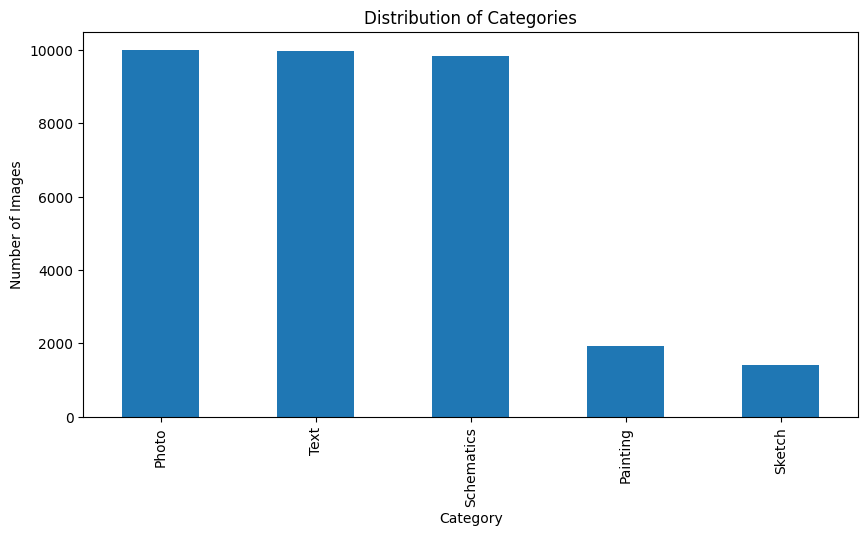

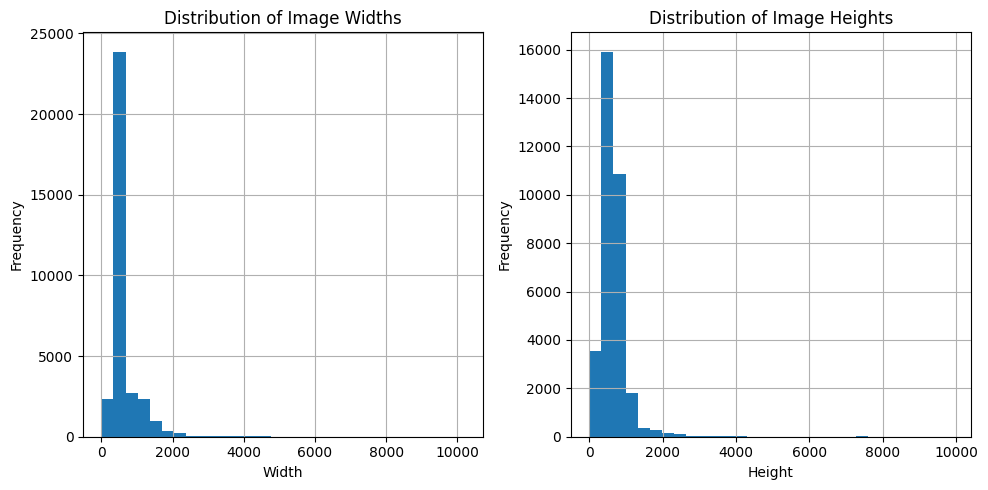

In [13]:
# Visualize the distribution of categories (including subcategories)
plt.figure(figsize=(10, 5))
df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

# Visualize the distribution of image dimensions across all categories
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Width'].hist(bins=30)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['Height'].hist(bins=30)
plt.title('Distribution of Image Heights')
plt.xlabel
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

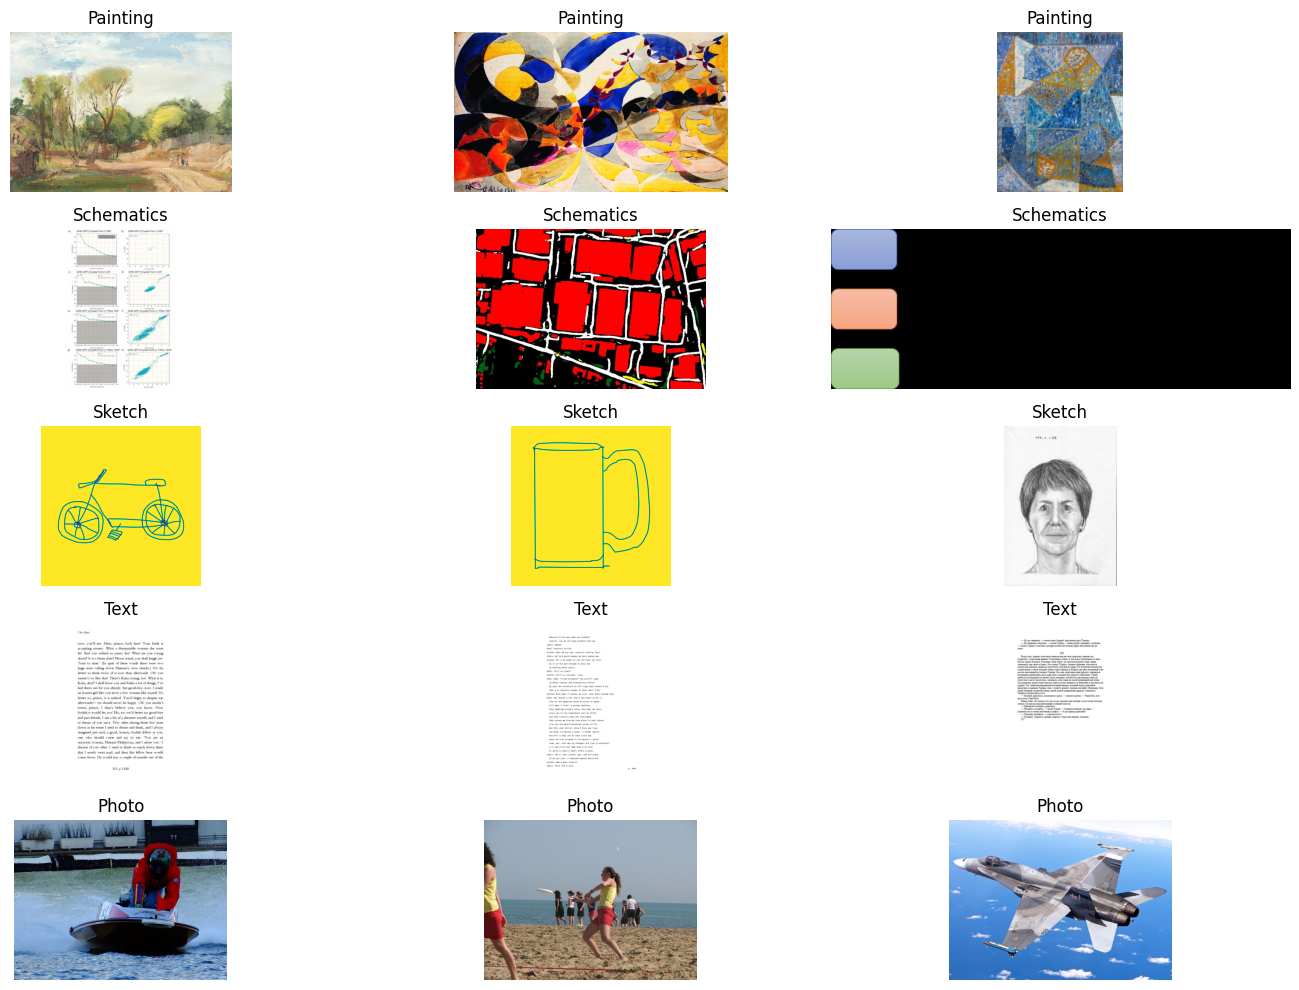

In [31]:
# Data Visualization 

# Define the subdirectory names for each category
photo_folder = os.path.join(new_clean_dir, 'Photo')
image_folder = os.path.join(new_clean_dir, 'Image')
categories = ['Painting', 'Schematics', 'Sketch', 'Text', 'Photo']

# Dictionary to hold images from each category
category_images = {}

# Load images from each category in the Image folder
for category in ['Painting', 'Schematics', 'Sketch', 'Text']:
    category_folder = os.path.join(image_folder, category)
    category_images[category] = load_images_from_folder(category_folder)
category_images['Photo'] = load_images_from_folder(photo_folder)

# Call the function to plot sample images
plot_sample_images(category_images, samples_per_category=3)

## 3. Unbalanced Data Handling

**`Rebalancing a dataset`** involves adjusting the class distribution to avoid an imbalance that could affect the performance of the model. This rebalancing is crucial for several reasons:
- **Overall Accuracy Improvement** : When some classes are much more represented than others (the images), the model may become biased and favor them, ignoring under-represented classes (the photos). Rebalancing forces the model to pay attention to all classes, which improves overall performance.
- **Reduction of Prediction Bias** : In an unbalanced dataset, the model tends to systematically predict the majority class (images), thus reducing the ability to detect minority classes (photos). Rebalancing corrects this bias and provides more accurate predictions for all classes.
- **Generalization Enhancement** : A model that is trained on a balanced dataset is more capable of generalizing, thus performing well on new data. It not only adapts to the majority classes but also learns to distinguish subtleties in minority data.
- **Better Consideration of Relevant Metrics** : In a class-unbalanced context, metrics like "*overall accuracy*" can be misleading. By balancing the dataset, we ensure a better relevance of other metrics, such as recall or F1-score, which are more sensitive to performance on minority classes.

In our case, there are more images than photos, as seen previously : 

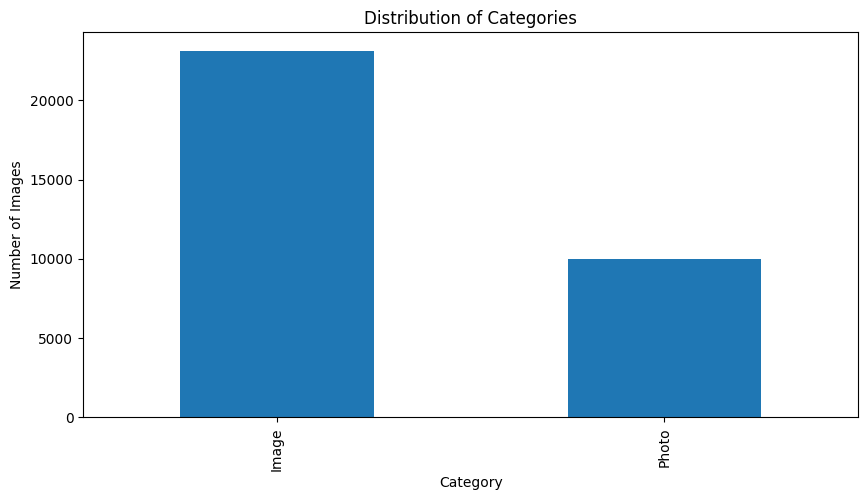

In [32]:
# Visualize the distribution of Photos/Images
df['Main Category'] = df['Category'].apply(lambda x: 'Image' if x in ['Painting', 'Schematics', 'Sketch', 'Text'] else 'Photo')
plt.figure(figsize=(10, 5))
df['Main Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.show()

To rebalance an unbalanced dataset, there are several methods, but we will focus on the two most common methods :
- **`Over-Sampling Minority Classes`** : This technique is to artificially increase the number of examples for under-represented classes (the photos). This can be done by simply duplicating existing samples or generating synthetic data using techniques such as **SMOTE** (*Synthetic Minority Over-sampling Technique*) ; We will perform the first.
- **`Under-Sampling Majority Classes`** : Conversely, the number of examples for over-represented classes (the images) can be reduced by removing some data. This allows the dataset to be rebalanced, but this method can have the disadvantage of potentially losing some information from the majority data, especially if the dataset is already small.

***NB*** : We could also do a **Combination of both methods** ; a hybrid approach that combines over-sampling and sub-sampling can, in some cases, be used to achieve a balance without losing too much information or overloading the model with artificial data.

In [6]:
# Base Path Setup for Rebalancing Scripts
base_dir = os.getcwd()
relative_path = r"..\..\DataSets\clean_dataset"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))
photo_path = os.path.join(dataset_dir, 'Photo')  
image_path = os.path.join(dataset_dir, 'Image')  

# Check if folders exist
if not image_path:
    print(f"Folder {image_path} doesn't exist.")
    exit()
if not photo_path:
    print(f"Folder {photo_path} doesn't exist.")
    exit()

For the Over-Sampling method, we will use an `Augmentation technique` : we copy and edit existing images, like **flipping, rotating, or zooming** them, to artificially increase the training dataset size, in order to avoid overfitting.

In [ ]:
# Script for Over-Sampling

# New Path Setup
OS_dataset_dir = r"..\..\DataSets\Rebalanced_DataSets\OverSampling"
photo_dst_folder = os.path.join(OS_dataset_dir, 'Photo') 
image_dst_folder = os.path.join(OS_dataset_dir, 'Image')  
os.makedirs(photo_dst_folder, exist_ok=True)
os.makedirs(image_dst_folder, exist_ok=True)

# Data Augmentation Pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(None, None, 3)),  # Horizontal Flip
    tf.keras.layers.RandomRotation(0.1),                                    # Rotation of 18 degrees
    tf.keras.layers.RandomZoom(height_factor=(-0.1, -0.1))                  # 10% Zoom
])

def augment_photos_and_save(src_folder, dst_folder, total_augments_needed):
    img_files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]
    num_files = len(img_files)
    augment_per_image = total_augments_needed // num_files 
    remainder = total_augments_needed % num_files  

    for idx, img_file in enumerate(img_files):
        img_path = os.path.join(src_folder, img_file)
        img = load_img(img_path) 
        img_array = img_to_array(img)

        shutil.copy(img_path, os.path.join(dst_folder, img_file))  

        num_augmentations = augment_per_image + (1 if idx < remainder else 0)

        for augment_idx in range(num_augmentations):
            augmented_image = data_augmentation(tf.expand_dims(img_array, 0)) 
            augmented_image = tf.squeeze(augmented_image).numpy().astype("uint8")  
            augmented_img_path = os.path.join(dst_folder, f'aug_{img_file.split(".")[0]}_{augment_idx}.jpeg')

            tf.keras.preprocessing.image.save_img(augmented_img_path, augmented_image)
            
total_augments_needed = 13330  

# Check if the OS dataset is already filled
if not is_folder_filled(OS_dataset_dir):
    print(f"Starting augmentation for photos, saving to {photo_dst_folder}")
    augment_photos_and_save(photo_path, photo_dst_folder, total_augments_needed)
    # Copy the Image folder with all its subfolders 
    print(f"Copying Image folder (with subfolders) to {image_dst_folder}")
    shutil.copytree(image_path, image_dst_folder, dirs_exist_ok=True)       # Copy the whole 'Image' folder
    print(f"Augmentation and copying complete. All images saved in {OS_dataset_dir}")
else:
    print(f"The (clean) over-sampling dataset is already filled in {OS_dataset_dir}.")

Let’s check if the new dataset is well balanced :

In [ ]:
# Analyze the dataset
df = analyze_dataset_with_nested_categories(OS_dataset_dir)

For the Under-Sampling method, we will just **delete randomly images from the majority class**, to split evenly the images between our categories.

In [7]:
# Script for Under-Sampling

# New Path Setup
US_dataset_dir = r"..\..\DataSets\Rebalanced_DataSets\UnderSampling"
photo_dst_folder = os.path.join(US_dataset_dir, 'Photo') 
image_dst_folder = os.path.join(US_dataset_dir, 'Image')  
os.makedirs(photo_dst_folder, exist_ok=True)
os.makedirs(image_dst_folder, exist_ok=True)

# Get the list of files in the "Image" folder (including subfolders)
image_files = []
for root, dirs, files in os.walk(image_path):
    for file in files:
        image_files.append(os.path.join(root, file))
# Number of images in the "Photo" folder
photo_count = len(os.listdir(photo_path))
# Calculate the number of images to keep in "Image"
images_to_keep = photo_count
# Calculate how many images need to be deleted
images_to_delete = len(image_files) - images_to_keep

# Check if the US dataset is already filled
if not is_folder_filled(US_dataset_dir):
    if images_to_delete > 0:
        # Select randomly the images to be deleted
        images_to_keep_list = random.sample(image_files, images_to_keep)
        # Copy the selected images to the new dataset directory
        for image in images_to_keep_list:
            # Create subdirectories in the destination if they exist in the source
            relative_path = os.path.relpath(image, image_path)
            new_image_path = os.path.join(image_dst_folder, relative_path)
            os.makedirs(os.path.dirname(new_image_path), exist_ok=True)
        
            # Copy the image
            shutil.copy2(image, new_image_path)

        print(f"{len(images_to_keep_list)} images were copied to the new dataset.")
    else:
            print("The folder already contains fewer images than photos, all images will be copied.")

    # Copy all the photo files to the new dataset
    for photo in os.listdir(photo_path):
        src_photo = os.path.join(photo_path, photo)
        dst_photo = os.path.join(photo_dst_folder, photo)
        shutil.copy2(src_photo, dst_photo)

    print("All photos have been copied to the new dataset.")
else:
    print(f"The (clean) under-sampling dataset is already filled in {US_dataset_dir}.")

9997 images were copied to the new dataset.
All photos have been copied to the new dataset.


Let’s check if the new dataset is well balanced :

In [10]:
# Analyze the dataset
df = analyze_dataset_with_nested_categories(US_dataset_dir)

Processing Painting, found 865 files.
Processing Schematics, found 4238 files.
Processing Sketch, found 608 files.
Processing Text, found 4286 files.
Processing Photo, found 9997 files.


*(865 + 4238 + 608 + 4286 = 9997)* : the dataset is well-balanced.

For the next part, **we will focus on the Under-Sampling Dataset**, then we will compare it to the Over-Sampling Dataset.

## 4. Data Preprocessing

Let's set up a Convolutional Neural Network (CNN) architecture for binary image classification, using Keras and TensorFlow.

**Configuring our model parameters :**

In [ ]:
# Global Variables
input_shape = (128, 128, 3)  # Image format (128x128, with 3 channels for RGB)
batch_size = 32
epochs = 10

# DataSet Path
data_dir = US_dataset_dir


The `batch size` determines how many samples are processed before the model updates its weights. Instead of passing all the data in one go, they are divided into small groups (batches). For example, with a batch size of 32, the model updates its parameters after processing 32 samples.
- **Batch Size = 32** : this is a moderate size that offers a compromise between performance and efficiency. A small batch size, such as 32, allows for better generalization, since the weights are updated more frequently. This can also help manage GPU memory efficiently. A larger batch might be faster, but could lead to less accurate convergence and require more memory.

An `epoch` corresponds to a complete passage of all the training data through the model. For example,  if you have 1 epoch, the model will see all data once.
- **Epochs = 10** : this number is often sufficient for a base model to converge towards an acceptable solution, especially for medium-sized datasets like ours. This allows the model to train over multiple cycles of the data set without overfitting. Beyond that, methods such as early stopping can be used to avoid training too long and lower performance.

In [ ]:
# Data preparation with ImageDataGenerator
datagen = ImageDataGenerator(
    rescale = 1./255,           # Pixel Normalization, between 0 and 1
    validation_split = 0.2      # Split data into 80% training, 20% validation
    rotation_range = 20,        # Randomly rotate images by up to 20 degrees
    width_shift_range = 0.2,    # Random horizontal shift by up to 20%
    height_shift_range = 0.2,   # Random vertical shift by up to 20%
    shear_range = 0.2,          # Shear transformations
    zoom_range = 0.2,           # Randomly zoom in/out by up to 30%
    horizontal_flip = True,     # Randomly flip images horizontally
    fill_mode = 'nearest',      # Fill missing pixels
)

**ImageDataGenerator** is used to perform **data augmentation** on images. This allows for random variations of the drive images, such as rotations, zooms, offsets and inversions. This helps the model to generalize better by training on a more diverse set of data. 

In addition, the pixels are normalized (values between 0 and 1) and the data is divided into **training and validation sets (80/20)**. These transformations increase the robustness of the model in the face of variations in actual data.

In [ ]:
train_set = datagen.flow_from_directory(
    data_dir,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training',
    seed = 42
)

validation_set = datagen.flow_from_directory(
    data_dir,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation',
    seed = 42
)

This code loads images from a directory using the data increase defined above :
- **flow_from_directory** allows images to be read directly from a folder containing classified sub-folders.
- Images are resized to **128x128** pixels, processed by **batchs** of the specified size.
- The data is divided into two sets: **train_set** for training and **validation_set** for validation, according to the defined distribution (80% training, 20% validation).
- **class_mode='binary'** is used for our binary classification problem (with two classes).
- Random seed (**seed=42**) ensures that increases and divisions are reproducible.

## 5. CNN Model Architecture

Here we define a function to construct a **CNN** model with variable hyperparameters, optimized for a **binary classification** task.
- The **convolution layers** apply filters to extract characteristics from images, with a filter size and number of filters selected dynamically via *hp.Choice*.
- Each convolution layer is followed by a **MaxPooling** (reduction of spatial dimension) and a **Dropout** to avoid overlearning.
- After three convolution layers, the output is flattened with **Flatten** to be used in a dense layer.
- A fully connected **Dense** layer with variable number of units is added, followed by an output layer with a **sigmoid activation** for binary classification.
- The model is compiled with a cost function **binary_crossentropy** and an optimizer **Adam**, whose learning rate is also a hyperparameter.


In [ ]:
def build_model(hp):
    inputs = Input(shape=input_shape)

    # First convolutional layer
    x = Conv2D(hp.Choice('conv_1_filter', [32, 64, 128]), 
               (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(hp.Choice('dropout_1', [0.3, 0.4, 0.5]))(x)

    # Second convolutional layer
    x = Conv2D(hp.Choice('conv_2_filter', [64, 128, 256]), 
               (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(hp.Choice('dropout_2', [0.3, 0.4, 0.5]))(x)

    # Third convolutional layer
    x = Conv2D(hp.Choice('conv_3_filter', [128, 256, 512]), 
               (3, 3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(hp.Choice('dropout_3', [0.3, 0.4, 0.5]))(x)

    # Flatten the output and create a fully connected layer
    x = Flatten()(x)
    x = Dense(hp.Choice('dense_1_units', [64, 128, 256]), activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-3, 1e-4, 5e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

**The impact of the Main Hyperparameters present can be generalized and their value justified as follows :**

1. `Number of Filters in Convolutional Layers` :
   - **Small (..., 32, 64)** : Fewer filters means the layer will extract less of the image’s characteristics. This may make the model faster and use less memory, but may not capture enough information for complex tasks.
   - **Large (128, 256, ...)** : More filters allow for more complex features to be extracted, which can improve model performance for complex tasks. However, this increases the cost of computing and can lead to overfitting if data is not sufficient.

2. `Dropout Rate` :
   - **Small (0.2, 0,3, 0.4)** : A low dropout rate means fewer neurons are ignored during training. This reduces regularization and can lead to overfitting if the model is too complex.
   - **Large (0.5, ...)** : A higher dropout rate puts more neurons "out of service" at each iteration, which helps to avoid overfitting. However, if the rate is too high, it can hinder learning because too much information is lost at each step.

3. `Number of Units in Dense layers` :
   - **Small (..., 32, 64)** : A reduced number of units in the Dense layer limits the model’s ability to learn complex representations. This may be sufficient for simple tasks, but inadequate for more complex problems.
   - **Large (128, 256, ...)** : More units allow the model to capture more relationships between features extracted by convolutional layers. This may improve accuracy, but increase the risk of over-adjustment and complexity of calculation.

4. `Learning Rate` :
   - **Small (1e-4, 5e-4)** : A low learning rate means the model will update its weights very slowly. This can lead to better convergence, but the model may also take a long time to converge or remain stuck in a local minimum.
   - **Large (1e-3)** : Higher learning rate allows faster weight updates. However, this can make learning unstable and prevent the model from converging properly, skipping over optimal solutions.

5. `L2 Regularization` :
   - **Small (0.01, 0.001)** : A low regularization means that the penalty applied on heavy weights is light, allowing the model to learn more freely. However, this can lead to overlearning if the model is too flexible.
   - **Large (0.05)** : Stronger regularization reduces the importance of high weights, which forces the model to be simpler and avoid over-adjustment. However, this can lead to under-learning if the regularization is too strong because the model will not be able to adapt sufficiently to the data.

**To Sum-up** :
- Small hyperparameters tend to reduce the complexity of the model, which may prevent over-fitting but may limit its ability to learn complex tasks. 
- Large hyperparameters, on the other hand, increase the capacity and flexibility of the model, but with a higher risk of overlearning and greater computational complexity.

**`The goal is to find a compromise between these hyperparameters to balance performance and generalizability.`**

To optimize the hyperparameters of a model, **`Grid Search`** and **`Random Search`** are effective techniques. They help identify the best set of hyperparameters to improve model performance.
- **Grid Search** : tests all possible combinations of hyperparameters. This ensures exhaustive exploration, which is crucial for complex interactions. However, it can be very slow, especially with many parameters.
- **Random Search** : selects a subset of combinations at random. This allows faster calculation times and can sometimes quickly identify promising regions. However, it may miss some optimal combinations.

In the context of a CNN model, **Grid Search** is preferred as it provides a full exploration of each hyperparameter. This allows for optimal performance, especially when interactions between parameters are important. It also ensures that the best configurations are not overlooked, which is essential for image classification tasks.

In [ ]:
tuner = kt.GridSearch(
    build_model,                              # Our function model to be optimized (defined previously)
    objective = 'val_loss',                   # Optimize validation loss
    max_trials = 5,                           # Maximum number of combinations of hyperparameters to test
    executions_per_trial = 1,                 # Each model configuration is evaluated only once
    directory = 'my_dir',
    project_name = 'grid_search_CNN'
)

This code implements a **GridSearch** with **Keras Tuner** to find the best hyperparameters for our model.
- **`objective = 'val_loss'`** : means that the algorithm seeks to minimize **loss on the validation set** in order to choose the best combination of hyperparameters.
- **'max_trials'** : limits the number of hyperparameter combinations tested, which allows for a reduction in run time while exploring various configurations.
- **executions_per_trial** : indicates that each model configuration will be evaluated only once (no averages over multiple runs).

In [ ]:
tuner.search(train_set, validation_data=validation_set, epochs=10, callbacks=[
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
])  

Then we start starts the search for hyperparameters using the previously defined GridSearch :
- **`tuner.search`** : performs the Training Data Search (**‘train_set‘**) while evaluating the model on the Validation Data (**‘validation_set‘**).
- **`epochs`** : sets the number of training times for each hyperparameter test, allowing the model to learn enough before evaluating its performance (can be modified).
- The **callback** **`EarlyStopping`** : monitors the **validation loss** to stop the training if it does not improve for **a certain amount of consecutive periods** (parameter **‘patience’** then can be adjusted). This prevents overfitting and saves time.
- **`restore_best_weights=True`** : ensures that the weight of the model is restored to the best trial (i.e., the model that achieved the best 'validation loss' score).

Then, we can extract and display the best hyperparameters found :

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Meilleurs hyperparamètres : {best_hps.values}")

- **`tuner.get_best_hyperparameters(num_trials=1)`** : retrieves the optimal hyperparameters based on the tests performed, here by requesting only one set of the best hyperparameters.

Once the best model is found, let's evaluate its performance : 

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]


history = best_model.fit(train_set, epochs=epochs, validation_data=validation_set,
                         callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

val_accuracy = best_model.evaluate(validation_set)
print(f"Validation Accuracy: {val_accuracy[1] * 100:.2f}%")

- **`tuner.get_best_models(num_models=1)`** : retrieves the best trained model from those tested, here by selecting only one model.
- **`history = best_model.fit(...)`** : drives the model on the training set for a specified number of epochs while using the validation set.
- The **callback** **‘EarlyStopping’** is also included, monitoring validation loss to stop training if no improvement is observed during few periods and to restore the best weights.
- **`val_accuracy = best_model.evaluate(validation_set)`** : evaluates the performance of the model on the validation set, returning loss and accuracy metrics.

We can then view the model’s training history and display the results (metrics variations), making it easier to analyze its performance.

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


plot_training_history(history)

## 6. CNN Model Architecture V2

## 7. AutoEncoder Architecture 

## 8. Taking it Further : Multiclass Classification

## Augmented data

Found 33323 files belonging to 2 classes.
Using 26659 files for training.
Found 33323 files belonging to 2 classes.
Using 6664 files for validation.
Epoch 1/10
833/834 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8157 - loss: 0.4975
Epoch 1: val_loss improved from inf to 0.30124, saving model to classification_best.keras
834/834 ━━━━━━━━━━━━━━━━━━━━ 87s 104ms/step - accuracy: 0.8158 - loss: 0.4973 - val_accuracy: 0.8986 - val_loss: 0.3012 - learning_rate: 1.0000e-05
Epoch 2/10
833/834 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8828 - loss: 0.3543
Epoch 2: val_loss did not improve from 0.30124
834/834 ━━━━━━━━━━━━━━━━━━━━ 83s 99ms/step - accuracy: 0.8828 - loss: 0.3543 - val_accuracy: 0.8741 - val_loss: 0.4516 - learning_rate: 1.0000e-05
Epoch 3/10
833/834 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8986 - loss: 0.3060
Epoch 3: val_loss improved from 0.30124 to 0.24967, saving model to classification_best.keras
834/834 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.8986 -

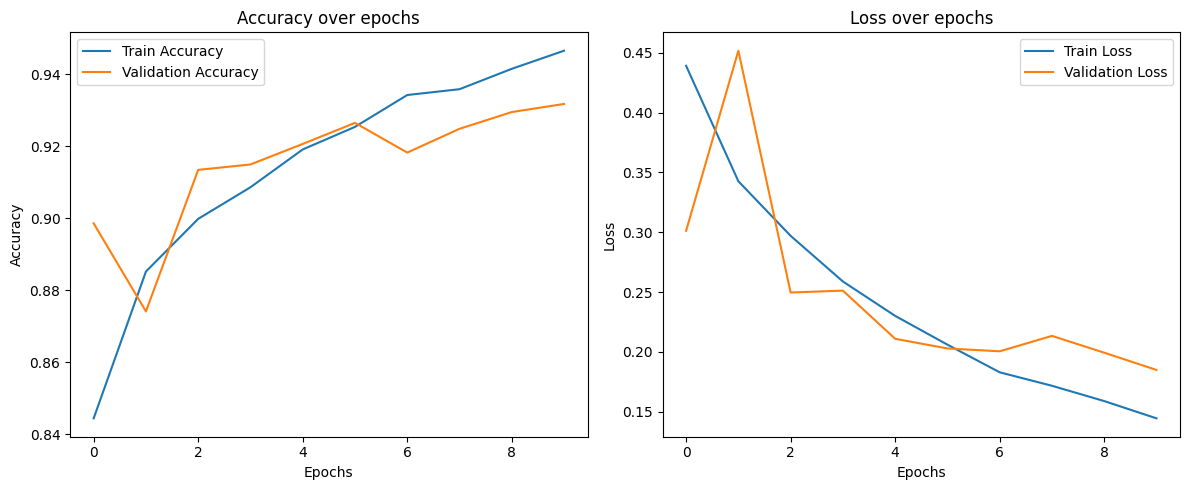

In [1]:

import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import os

# Parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 10
learning_rate = 1e-5  # Lowered for stability in training
num_classes = 2  # Assuming binary classification with 2 classes

# Path to your dataset
data_dir = r"/Users/youssefraies/Desktop/Dev Projects/DataSciencePictureDesc/DataSets/data_set_livrable_1"

# Load and normalize the training and validation sets
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Training dataset
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=batch_size,
    label_mode='int'  # Use 'int' to return binary labels (0 or 1)
)

# Validation dataset
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=batch_size,
    label_mode='int'  # Use 'int' to return binary labels (0 or 1)
)

# Apply normalization to the datasets
train_set = train_set.map(lambda x, y: (normalization_layer(x), y))
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

# Encoder construction
def build_encoder(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    return Model(input_img, encoded)

# Build the encoder
encoder = build_encoder(input_shape)

# Add classification layers after the encoder
def build_encoder_classifier(encoder, input_shape, num_classes):
    model = Sequential()
    model.add(encoder)  # Use the encoder's output for classification
    model.add(Flatten())  # Flatten the output of the encoder
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    # For binary classification, use sigmoid instead of softmax
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output (single unit with sigmoid)

    # Compile the model with binary_crossentropy for binary classification
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
                  metrics=['accuracy'])
    
    return model

# Create the classification model based on the encoder
encoder_classifier = build_encoder_classifier(encoder, input_shape, num_classes)

# Callbacks for training
classification_checkpoint = ModelCheckpoint('classification_best.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
log_dir = os.path.join("logs", "classification")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = encoder_classifier.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6),
        classification_checkpoint,
        tensorboard_callback
    ]
)

# Plot training history
def plot_training(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over epochs')

    plt.tight_layout()
    plt.show()

# Visualize the results of the training
plot_training(history)

# Function to visualize the prediction
def visualize_prediction(image_path, model, class_names):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))
    img_array = np.expand_dims(img_resized / 255.0, axis=0)  # Normalization

    # Predict the class of the image
    prediction = model.predict(img_array)
    predicted_class = (prediction[0] > 0.5).astype(int)  # Binary output (0 or 1 based on threshold 0.5)

    # Display the image and predicted class
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted class: {class_names[predicted_class[0]]}")
    plt.axis('off')
    plt.show()




## Clean Data Set 

<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
/var/folders/rn/3qmnqdxn3pz497mh9zrn86w40000gn/T/ipykernel_57819/1114203578.py:18: SyntaxWarning: invalid escape sequence '\c'
  data_dir = "/Users/youssefraies/Desktop/Dev Projects/DataSciencePictureDesc/DataSets/data_set_livrable_1/..\clean_dataset"


Found 32321 files belonging to 2 classes.
Using 25857 files for training.
Found 32321 files belonging to 2 classes.
Using 6464 files for validation.
Epoch 1/10
808/809 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8178 - loss: 0.5229 - precision_3: 0.8178 - recall_3: 0.8178
Epoch 1: val_loss improved from inf to 0.26767, saving model to classification_best.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.8178 - loss: 0.5228 - precision_3: 0.8178 - recall_3: 0.8178 - val_accuracy: 0.8937 - val_loss: 0.2677 - val_precision_3: 0.8937 - val_recall_3: 0.8937 - learning_rate: 1.0000e-05
Epoch 2/10
808/809 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8747 - loss: 0.3837 - precision_3: 0.8747 - recall_3: 0.8747
Epoch 2: val_loss improved from 0.26767 to 0.23420, saving model to classification_best.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.8747 - loss: 0.3836 - precision_3: 0.8747 - recall_3: 0.8747 - val_accuracy: 0.8998 - val_loss: 0.2342 - val_precis

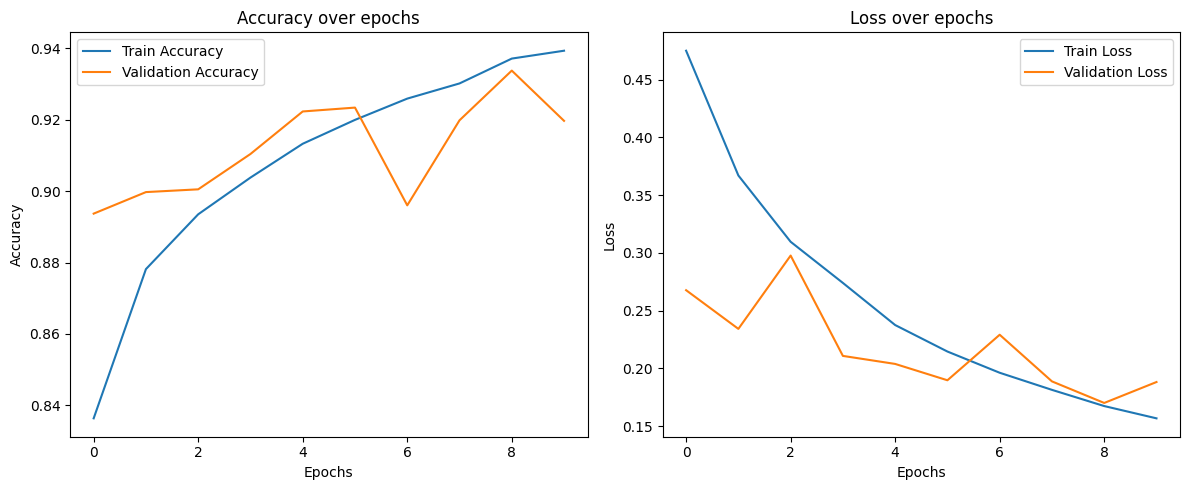

In [5]:
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import os

# Base parameters
input_shape = (128, 128, 3)
batch_size = 32
epochs = 10
learning_rate = 1e-5  # Reduced learning rate for stability

# Path to your dataset
data_dir = "/Users/youssefraies/Desktop/Dev Projects/DataSciencePictureDesc/DataSets/data_set_livrable_1/..\clean_dataset"

# Normalization function
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Load the training dataset
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=batch_size,
    label_mode='categorical'  # Ensure labels are one-hot encoded for multi-class classification
)

# Load the validation dataset
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=batch_size,
    label_mode='categorical'  # Ensure labels are one-hot encoded for multi-class classification
)

# Apply normalization to the datasets
train_set = train_set.map(lambda x, y: (normalization_layer(x), y))
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

# Build encoder only
def build_encoder(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # Last encoder layer
    return Model(input_img, encoded)  # Return encoder

# Build the encoder
encoder = build_encoder(input_shape)

# Add classification layers after the encoder
def build_encoder_classifier(encoder, input_shape):
    model = Sequential()
    model.add(encoder)  # Use the encoder for classification
    model.add(Flatten())  # Flatten the output of the encoder
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Adjusted for 2 classes (softmax for multi-class classification)

    # Compile the model with multi-class loss function and metrics
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',  # Ensure you're using categorical_crossentropy
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    return model

# Create the classification model based on the encoder
encoder_classifier = build_encoder_classifier(encoder, input_shape)

# Save the best model during training
classification_checkpoint = ModelCheckpoint('classification_best.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# TensorBoard for training visualization
log_dir = os.path.join("logs", "classification")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the classification model
history = encoder_classifier.fit(
    train_set,  # Use the dataset with labels
    epochs=epochs,
    validation_data=test_set,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6),
        classification_checkpoint,
        tensorboard_callback
    ]
)

# Function to plot the performance curves
def plot_training(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over epochs')

    plt.tight_layout()
    plt.show()

# Visualize training results
plot_training(history)

# Function to visualize prediction probabilities
def visualize_prediction(image_path, model):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))
    img_array = np.expand_dims(img_resized / 255.0, axis=0)  # Normalization

    # Predict the probability that the image is a specific class
    prediction = model.predict(img_array)
    probability = prediction[0][0]  # Probability for one of the classes

    # Display the image and the prediction
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted probability for class: {probability * 100:.2f}%")
    plt.axis('off')
    plt.show()
